C:\Users\gargs\AppData\Local\Temp\ipykernel_23484\2095535906.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['age'].fillna(customer_data['age'].median(), inplace=True)


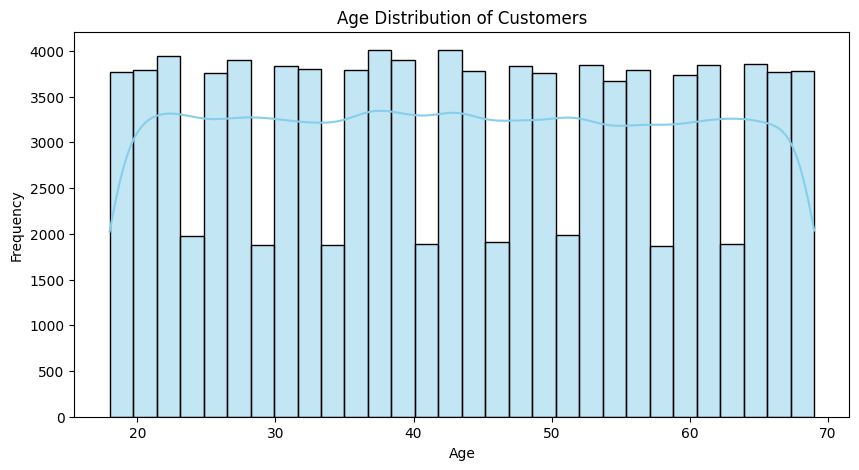

C:\Users\gargs\AppData\Local\Temp\ipykernel_23484\2095535906.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='gender', palette='pastel')


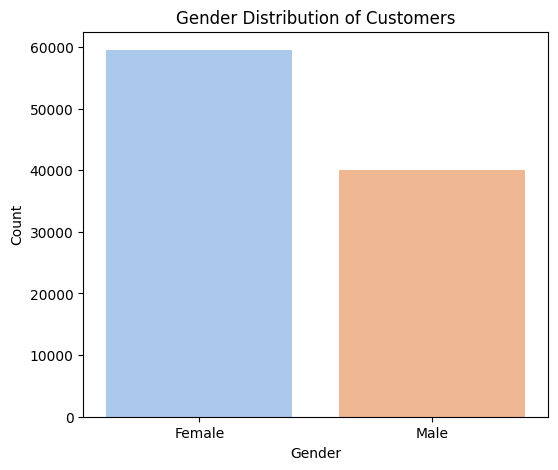

C:\Users\gargs\AppData\Local\Temp\ipykernel_23484\2095535906.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='payment_method', palette='muted')


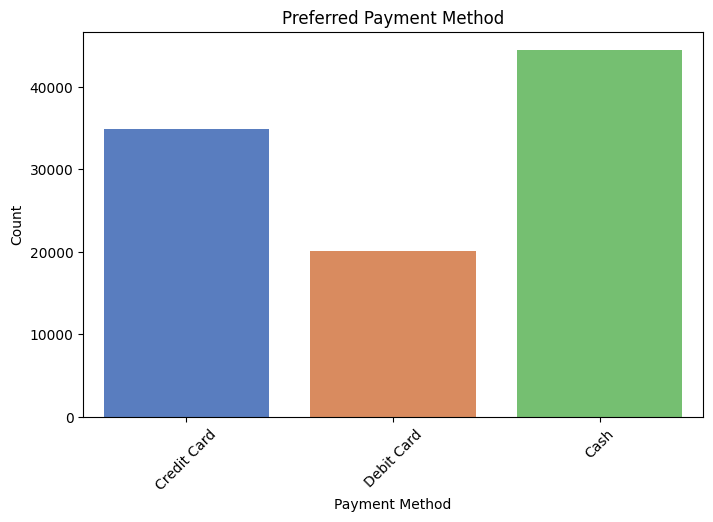

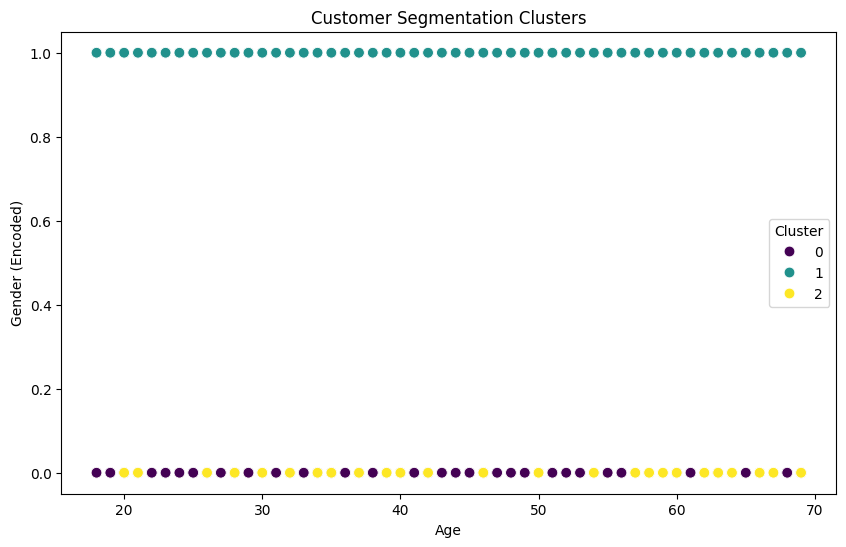

Cluster Centers (Standardized):
 [[-3.06318805e-03 -8.19787808e-01  7.92115560e-01]
 [-2.78263364e-03  1.21982785e+00 -8.70768407e-04]
 [ 8.00627256e-03 -8.19787808e-01 -9.83953275e-01]]

Cluster Sizes:
 cluster
1    39975
0    32973
2    26509
Name: count, dtype: int64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the customer data
data_path = "C:\\Users\\gargs\\OneDrive\\Desktop\\customer segmentation\\customer_data.csv"
customer_data = pd.read_csv(data_path)

# Data Cleaning - Fill missing 'age' values with median
customer_data['age'].fillna(customer_data['age'].median(), inplace=True)

# Exploratory Data Analysis
# Plot Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot Gender Distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=customer_data, x='gender', palette='pastel')
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plot Preferred Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='payment_method', palette='muted')
plt.title("Preferred Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Customer Segmentation using KMeans
# Encoding categorical features (Gender, Payment Method)
label_encoder = LabelEncoder()
customer_data['gender_encoded'] = label_encoder.fit_transform(customer_data['gender'])
customer_data['payment_encoded'] = label_encoder.fit_transform(customer_data['payment_method'])

# Selecting features for clustering
X = customer_data[['age', 'gender_encoded', 'payment_encoded']]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['age'], y=customer_data['gender_encoded'],
                hue=customer_data['cluster'], palette='viridis', s=60)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Age")
plt.ylabel("Gender (Encoded)")
plt.legend(title="Cluster")
plt.show()

# Print out the centroids and the number of customers in each cluster
print("Cluster Centers (Standardized):\n", kmeans.cluster_centers_)
print("\nCluster Sizes:\n", customer_data['cluster'].value_counts())